<a href="https://colab.research.google.com/github/jeonghwan94/project/blob/master/jun_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [현재 참여 중인 Kaggle 대회 링크 입니다.(더블 클릭 하시면 이동이 가능합니다)](https://www.kaggle.com/c/tabular-playground-series-jun-2021)

>자세한 사항은 대회 마감 후 상세히 작성 하도록 하고 현재 까지 진행 상황만 업데이트 하는 방식으로 진행하겠습니다 감사합니다. :)

## Import

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-jun-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2021/train.csv
/kaggle/input/tabular-playground-series-jun-2021/test.csv


## Read

In [ ]:
train = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2021/train.csv")
train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,...,0,1,1,0,0,0,4,1,0,Class_6
199996,199996,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
199997,199997,1,2,0,0,0,2,0,1,8,...,1,0,1,1,1,0,1,0,0,Class_8
199998,199998,0,0,2,0,2,1,0,0,3,...,0,0,3,2,1,0,0,1,0,Class_7


In [ ]:
test = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2021/test.csv")
test

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,299996,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,299997,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,299998,0,0,0,0,2,2,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
submission = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2021/sample_submission.csv")
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
1,200001,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
2,200002,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
3,200003,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
4,200004,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99996,299996,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99997,299997,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99998,299998,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111


## Analyse target

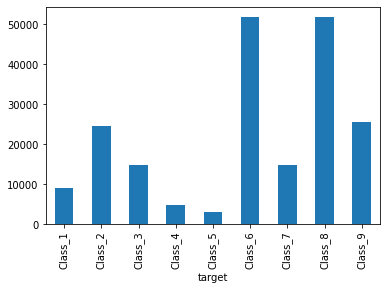

In [ ]:

import matplotlib.pyplot as plt

train.groupby('target').target.count().plot.bar(ylim=0)
plt.show()


In [ ]:
target = train.groupby('target').target.count()
target

target
Class_1     9118
Class_2    24431
Class_3    14798
Class_4     4704
Class_5     3064
Class_6    51811
Class_7    14769
Class_8    51763
Class_9    25542
Name: target, dtype: int64

## Define target

In [ ]:
target = train.target

## Drop target

In [ ]:
train.drop('target', axis = 1, inplace = True)
train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,6,1,0,0,0,0,7,...,3,0,0,0,0,0,0,2,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,1,0,3,0,...,8,0,0,0,0,1,0,0,0,0
3,3,0,0,7,0,1,5,2,2,0,...,0,0,4,0,2,2,0,4,3,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,...,1,0,1,1,0,0,0,4,1,0
199996,199996,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199997,199997,1,2,0,0,0,2,0,1,8,...,4,1,0,1,1,1,0,1,0,0
199998,199998,0,0,2,0,2,1,0,0,3,...,0,0,0,3,2,1,0,0,1,0


## Combine train and test

In [ ]:
combi = train.append(test)
combi

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,6,1,0,0,0,0,7,...,3,0,0,0,0,0,0,2,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,1,0,3,0,...,8,0,0,0,0,1,0,0,0,0
3,3,0,0,7,0,1,5,2,2,0,...,0,0,4,0,2,2,0,4,3,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,299996,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,299997,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,299998,0,0,0,0,2,2,0,0,1,...,1,0,0,0,0,1,0,1,0,0


## Drop id

In [ ]:
combi.drop('id', axis = 1, inplace = True)
combi

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,0,0,0,0,2,2,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


## Check for null values

In [ ]:
combi.isnull().sum().sum()

0

## Normalise data

In [ ]:
combi = (combi.max() - combi) / (combi.max() - combi.min())
combi

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,1.000000,1.0,0.906250,0.985714,1.000000,1.000000,1.000000,1.000000,0.815789,1.000000,...,0.944444,1.000000,1.000000,1.0,1.000000,1.000000,1.0,0.967213,1.000000,1.000000
1,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.916667,1.000000,1.0,1.000000,1.000000,1.0,1.000000,0.992308,1.000000
2,1.000000,1.0,1.000000,1.000000,1.000000,0.986842,1.000000,0.900000,1.000000,1.000000,...,0.851852,1.000000,1.000000,1.0,1.000000,0.985075,1.0,1.000000,1.000000,1.000000
3,1.000000,1.0,0.890625,1.000000,0.973684,0.934211,0.953488,0.933333,1.000000,0.986111,...,1.000000,1.000000,0.949367,1.0,0.969231,0.970149,1.0,0.934426,0.976923,1.000000
4,0.983607,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
99996,1.000000,1.0,1.000000,1.000000,1.000000,0.986842,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
99997,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.987342,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.961538
99998,1.000000,1.0,1.000000,1.000000,0.947368,0.973684,1.000000,1.000000,0.973684,1.000000,...,0.981481,1.000000,1.000000,1.0,1.000000,0.985075,1.0,0.983607,1.000000,1.000000


## One hot encode target

In [ ]:
target = pd.get_dummies(target)
target

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,1,0,0,0
199996,0,0,0,0,0,1,0,0,0
199997,0,0,0,0,0,0,0,1,0
199998,0,0,0,0,0,0,1,0,0


## Define independant and dependant variables

In [ ]:
y = target
X = combi[: len(train)]
X_test = combi[len(train) :]

## Split training set

In [ ]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)


## Select model

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = MultiOutputRegressor(HistGradientBoostingRegressor(random_state=1, max_iter=10000)).fit(X_train, y_train)
model.score(X_train, y_train)

0.060988506307510834

## Predict on validation set

In [ ]:
y_pred = model.predict(X_val)
model.score(X_val, y_val)

0.04249598736671778

## Predict on test sdet

In [ ]:
predictions = model.predict(X_test)
predictions.shape

(100000, 9)

In [ ]:
predictions[predictions < 0] = 0

## Prepare submission

In [ ]:
submission.Class_1 = predictions[:, 0]
submission.Class_2 = predictions[:, 1]
submission.Class_3 = predictions[:, 2]
submission.Class_4 = predictions[:, 3]
submission.Class_5 = predictions[:, 4]
submission.Class_6 = predictions[:, 5]
submission.Class_7 = predictions[:, 6]
submission.Class_8 = predictions[:, 7]
submission.Class_9 = predictions[:, 8]

In [ ]:
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv("submission.csv")
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.056758,0.369189,0.169020,0.028709,0.013089,0.173246,0.028059,0.039748,0.142254
1,200001,0.044092,0.111293,0.078403,0.020462,0.013851,0.226724,0.070397,0.306715,0.125718
2,200002,0.033551,0.060336,0.045303,0.017217,0.009936,0.646270,0.036080,0.140176,0.072013
3,200003,0.054596,0.087244,0.080249,0.025711,0.013145,0.191155,0.065971,0.233638,0.148375
4,200004,0.045219,0.122220,0.074728,0.023211,0.011858,0.322072,0.055382,0.279085,0.137526
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.067165,0.393703,0.142877,0.027528,0.015378,0.090507,0.046692,0.074947,0.144492
99996,299996,0.062368,0.267398,0.124816,0.025208,0.014322,0.185705,0.049606,0.150821,0.138287
99997,299997,0.066880,0.232676,0.118519,0.027248,0.013918,0.157061,0.042534,0.160099,0.137818
99998,299998,0.029723,0.019750,0.021727,0.016045,0.014470,0.388882,0.073117,0.319927,0.087927
